# Customer Segmentation

<hr>

### About

Knowing your customers is very essential in business because once you know your customers you can create schemes and products as per their needs and your profit interest.

Using `Data Science` and `Machine Learning` we can separate our customers into number of groups we want.

Here it is an `Unsupervised Learning` problem and moreover it is an `Clustering` problem.

<hr>

#### Importing Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import StratifiedKFold, GridSearchCV

In [2]:
# Ignoring warinings
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

#### Loading the dataset

In [3]:
df = pd.read_csv('Cust_Segmentation.csv')
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer Id      850 non-null    int64  
 1   Age              850 non-null    int64  
 2   Edu              850 non-null    int64  
 3   Years Employed   850 non-null    int64  
 4   Income           850 non-null    int64  
 5   Card Debt        850 non-null    float64
 6   Other Debt       850 non-null    float64
 7   Defaulted        700 non-null    float64
 8   Address          850 non-null    object 
 9   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(5), object(1)
memory usage: 66.5+ KB


In [5]:
# Droping "Address" column
df = df.drop(['Address'], axis='columns')
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


#### Feature Scaling

In [6]:
from sklearn.preprocessing import StandardScaler

X = df.values[:, 1:]   # Leaving the "Customer Id" column

# If any NaN then converting it to 0(zero)
X = np.nan_to_num(X)

X = StandardScaler().fit_transform(X)

X[:5]

array([[ 0.74291541,  0.31212243, -0.37878978, -0.71845859, -0.68381116,
        -0.59048916, -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 ,  1.38432469,  1.41447366,
         1.51296181, -0.52379654,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 ,  0.26803233,  2.13414111,
         0.80170393,  1.90913822,  1.59755385],
       [-0.75023477,  0.31212243, -0.67404087, -0.71845859, -0.42164323,
        -0.75446707, -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  3.31184882,  5.35624866,  3.63890032,
         1.71609424, -0.52379654, -0.44250653]])

#### Parameter Tuning

In [7]:
def km_param_selection(X):
    n_clusters = [i for i in range(1, 10)]
    init = ['k-means++', 'random']
    algorithm = ['auto', 'full', 'elkan']

    param_grid = {
        'n_clusters': n_clusters,
        'init': init,
        'algorithm': algorithm
    }

    grid_search = GridSearchCV(KMeans(), param_grid)
    grid_search.fit(X)
    best_score = grid_search.best_score_
    best_parameters = grid_search.best_estimator_.get_params()
    return (best_score, best_parameters)

best_score ,best_params = km_param_selection(X)
print(best_score)
print(best_params)

-564.6456199727766
{'algorithm': 'elkan', 'copy_x': True, 'init': 'random', 'max_iter': 300, 'n_clusters': 9, 'n_init': 10, 'n_jobs': 'deprecated', 'precompute_distances': 'deprecated', 'random_state': None, 'tol': 0.0001, 'verbose': 0}


`Here we got 9 clusters as best parameter.`

#### Fitting the model

In [8]:
n_clusters = 9

model = KMeans(algorithm='elkan', init='random', n_clusters=9)
model.fit(X)

KMeans(algorithm='elkan', init='random', n_clusters=9)

#### Checking the labels

In [9]:
labels = model.labels_
print(labels)

[3 7 0 8 2 7 3 6 8 7 0 3 8 1 4 8 8 6 7 3 8 6 0 7 5 3 8 3 3 3 7 1 4 6 8 8 4
 4 8 7 4 5 1 6 1 5 8 8 8 8 7 1 0 7 0 4 4 6 3 3 1 1 7 5 8 8 3 4 1 4 6 6 7 1
 8 8 3 8 5 3 1 0 7 8 1 8 6 8 4 4 3 8 4 4 6 3 8 3 4 6 0 5 3 0 4 5 3 8 3 6 3
 6 8 4 8 3 8 3 5 8 8 8 6 3 3 3 8 8 1 8 3 3 8 6 1 6 7 8 3 0 0 8 8 8 5 1 3 0
 8 8 3 1 4 1 3 1 7 7 4 0 8 1 3 1 8 6 6 8 8 6 5 8 6 4 3 0 3 8 4 7 0 3 8 2 0
 1 3 3 3 6 1 1 6 4 3 6 8 7 2 6 7 8 4 3 3 0 8 7 7 4 8 3 3 6 3 4 0 5 3 3 4 7
 8 6 8 8 5 8 1 0 3 1 1 8 5 8 3 4 5 8 8 3 8 8 3 7 3 3 6 6 8 6 3 1 7 0 3 4 8
 8 3 6 1 4 7 0 8 5 3 3 4 8 3 3 3 4 4 0 8 8 8 2 7 8 7 8 7 8 7 5 8 3 8 0 8 8
 4 8 4 7 3 6 8 8 4 3 1 1 0 3 8 8 3 8 3 8 8 4 3 4 5 3 0 8 8 3 4 4 3 3 3 5 4
 3 6 0 8 7 1 3 6 3 3 0 5 3 8 6 8 8 2 6 3 8 8 3 5 6 6 8 7 0 8 4 6 8 3 6 7 3
 4 8 7 3 0 1 1 3 4 8 3 8 8 3 5 3 7 1 8 8 1 0 3 0 8 3 8 7 3 8 1 8 4 8 1 0 4
 5 6 3 8 3 1 0 4 3 5 4 1 8 3 0 8 3 5 1 3 0 6 8 5 1 4 6 5 8 8 8 5 3 3 3 8 2
 3 0 3 1 3 3 5 4 6 8 5 8 0 8 8 5 6 2 1 1 8 6 6 8 3 0 7 1 3 7 3 4 3 8 8 0 1
 0 3 8 3 8 1 7 4 4 1 5 3 

#### We assign the labels to each row in dataframe

In [10]:
df["Clus_km"] = labels
df.head(5)

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Clus_km
0,1,41,2,6,19,0.124,1.073,0.0,6.3,3
1,2,47,1,26,100,4.582,8.218,0.0,12.8,7
2,3,33,2,10,57,6.111,5.802,1.0,20.9,0
3,4,29,2,4,19,0.681,0.516,0.0,6.3,8
4,5,47,1,31,253,9.308,8.908,0.0,7.2,2


#### Checking the centroid values by averaging the features in each cluster

In [11]:
df.groupby('Clus_km').mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Clus_km,,,,,,,,,
0,416.061538,36.692308,1.923077,5.953846,40.384615,2.653354,4.754108,1.000000,19.887692
1,443.280488,34.987805,1.390244,7.731707,35.902439,1.939134,4.196768,0.000000,17.586585
2,433.285714,46.285714,1.928571,22.642857,213.142857,11.737786,16.239857,0.727273,16.821429
3,424.143646,39.491713,1.276243,11.353591,44.132597,0.870856,1.785110,0.013986,6.271271
4,424.721649,28.350515,1.814433,2.618557,25.701031,0.882804,1.558897,1.000000,9.984536
5,445.421053,41.824561,2.105263,14.877193,85.175439,4.831053,9.558632,0.217391,18.271930
6,417.392405,34.506329,3.481013,5.544304,44.367089,1.018772,2.242633,0.016129,8.008861
7,403.030769,44.384615,1.661538,20.292308,103.846154,2.065923,4.304862,0.000000,6.838462
8,427.085714,28.476190,1.323810,4.900000,26.333333,0.529029,1.239538,0.000000,6.920476


<hr>

## Visualising the clusters

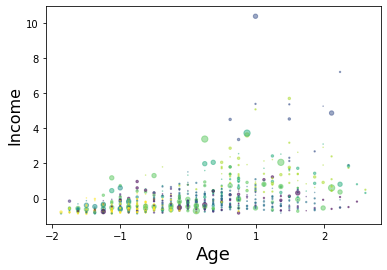

In [12]:
area = np.pi * ( X[:, 1])**2  
plt.scatter(X[:, 0], X[:, 3], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)

plt.show()

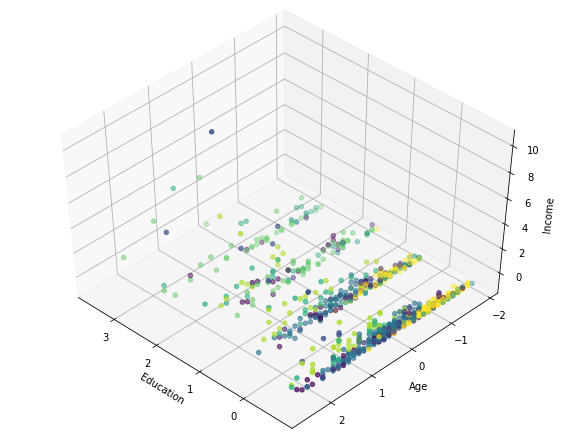

In [13]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
# plt.ylabel('Age', fontsize=18)
# plt.xlabel('Income', fontsize=16)
# plt.zlabel('Education', fontsize=16)
ax.set_xlabel('Education')
ax.set_ylabel('Age')
ax.set_zlabel('Income')

ax.scatter(X[:, 1], X[:, 0], X[:, 3], c= labels.astype(np.float))

<hr>

## But since we want to do segment custormers into 3 groups therefore n_custers=3

In [14]:
df.drop(['Clus_km'], axis='columns', inplace=True)
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [15]:
X = df.values[:, 1:]   # Leaving the "Customer Id" column

# If any NaN then converting it to 0(zero)
X = np.nan_to_num(X)

X[:5]

array([[4.100e+01, 2.000e+00, 6.000e+00, 1.900e+01, 1.240e-01, 1.073e+00,
        0.000e+00, 6.300e+00],
       [4.700e+01, 1.000e+00, 2.600e+01, 1.000e+02, 4.582e+00, 8.218e+00,
        0.000e+00, 1.280e+01],
       [3.300e+01, 2.000e+00, 1.000e+01, 5.700e+01, 6.111e+00, 5.802e+00,
        1.000e+00, 2.090e+01],
       [2.900e+01, 2.000e+00, 4.000e+00, 1.900e+01, 6.810e-01, 5.160e-01,
        0.000e+00, 6.300e+00],
       [4.700e+01, 1.000e+00, 3.100e+01, 2.530e+02, 9.308e+00, 8.908e+00,
        0.000e+00, 7.200e+00]])

#### Parameter Tuning

In [16]:
def km_param_selection(X):
    init = ['k-means++', 'random']
    algorithm = ['auto', 'full', 'elkan']

    param_grid = {
        'init': init,
        'algorithm': algorithm
    }

    grid_search = GridSearchCV(KMeans(n_clusters=3), param_grid)
    grid_search.fit(X)
    best_score = grid_search.best_score_
    best_parameters = grid_search.best_estimator_.get_params()
    return (best_score, best_parameters)

best_score ,best_params = km_param_selection(X)
print(best_score)
print(best_params)

-89031.40336171493
{'algorithm': 'full', 'copy_x': True, 'init': 'k-means++', 'max_iter': 300, 'n_clusters': 3, 'n_init': 10, 'n_jobs': 'deprecated', 'precompute_distances': 'deprecated', 'random_state': None, 'tol': 0.0001, 'verbose': 0}


#### Fitting the model

In [17]:
n_clusters = 3

model = KMeans(algorithm='full', init='k-means++', n_clusters=3)
model.fit(X)

KMeans(algorithm='full', n_clusters=3)

#### Checking the labels

In [18]:
labels = model.labels_
print(labels)

[0 2 0 0 1 2 0 2 0 2 2 0 0 0 0 0 0 0 2 0 0 0 0 2 2 2 0 0 2 0 2 0 0 0 0 0 0
 0 0 2 0 2 0 1 0 2 0 0 0 2 2 0 0 2 2 0 0 0 2 0 2 0 2 2 0 0 2 0 0 0 2 2 2 0
 0 0 0 0 2 0 2 2 1 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 2 0
 0 0 0 0 0 0 0 2 0 0 0 0 0 0 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 0 0 0 0 2 0 2 0
 0 0 0 0 0 0 2 0 2 2 0 2 0 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0 2 0
 0 0 0 0 2 0 0 2 0 2 0 0 2 1 0 2 0 0 0 0 0 0 1 2 0 0 0 0 2 0 0 2 2 0 2 0 2
 0 0 0 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 1 2 0 0 0 0 0 0 0 2 0 0 0 0
 0 0 2 0 0 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 2 0 2 0 2 2 0 0 0 0 0 0
 0 0 0 2 2 2 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 0 0 0 0 2 0 2 2 0
 0 0 0 0 2 0 0 0 0 0 0 2 0 0 2 0 0 2 0 0 0 0 0 2 0 0 0 1 0 0 0 2 0 2 2 2 0
 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0
 0 2 0 0 2 0 0 0 0 2 0 0 0 0 2 0 0 2 0 0 0 0 0 0 0 0 0 2 0 0 0 2 0 0 0 0 1
 0 0 0 0 0 0 2 0 0 0 1 0 0 0 0 2 0 1 0 0 0 0 2 0 2 2 2 0 0 2 2 0 0 0 0 0 0
 0 2 0 0 0 0 2 0 0 0 2 0 

#### We assign the labels to each row in dataframe

In [19]:
df["Clus_km"] = labels
df.head(5)

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Clus_km
0,1,41,2,6,19,0.124,1.073,0.0,6.3,0
1,2,47,1,26,100,4.582,8.218,0.0,12.8,2
2,3,33,2,10,57,6.111,5.802,1.0,20.9,0
3,4,29,2,4,19,0.681,0.516,0.0,6.3,0
4,5,47,1,31,253,9.308,8.908,0.0,7.2,1


#### Checking the centroid values by averaging the features in each cluster

In [20]:
df.groupby('Clus_km').mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Clus_km,,,,,,,,,
0,432.468413,32.964561,1.614792,6.374422,31.164869,1.032541,2.104133,0.285185,10.094761
1,410.166667,45.388889,2.666667,19.555556,227.166667,5.678444,10.907167,0.285714,7.322222
2,402.295082,41.333333,1.956284,15.256831,83.928962,3.103639,5.765279,0.171233,10.724590


<hr>

## Visualising the clusters

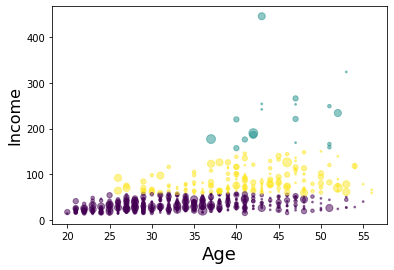

In [21]:
area = np.pi * ( X[:, 1])**2  
plt.scatter(X[:, 0], X[:, 3], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)

plt.show()

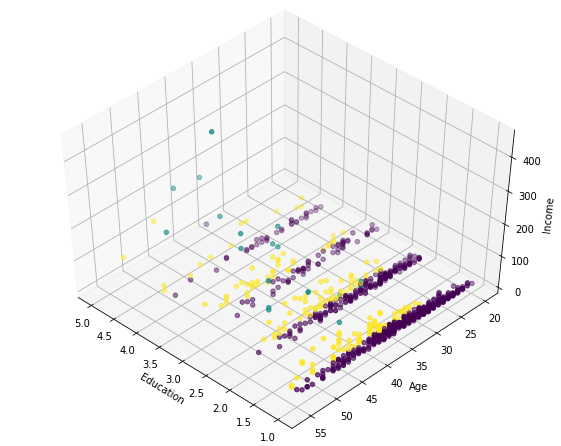

In [22]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
# plt.ylabel('Age', fontsize=18)
# plt.xlabel('Income', fontsize=16)
# plt.zlabel('Education', fontsize=16)
ax.set_xlabel('Education')
ax.set_ylabel('Age')
ax.set_zlabel('Income')

ax.scatter(X[:, 1], X[:, 0], X[:, 3], c= labels.astype(np.float))

<hr>